In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/NewDataSet/archive.zip','r') as zip_ref:
  zip_ref.extractall()

In [9]:
solar = pd.read_csv('/content/installed-solar-PV-capacity.csv')
elect = pd.read_csv('/content/share-electricity-renewables.csv')
eSolar= pd.read_csv('/content/share-electricity-solar.csv')
eWind = pd.read_csv('/content/share-electricity-wind.csv')
wind = pd.read_csv('/content/wind-generation.csv')
renew = pd.read_csv('/content/renewable-share-energy.csv')
giga= pd.read_csv('/content/cumulative-installed-wind-energy-capacity-gigawatts.csv')

In [10]:
solar

,Entity,Code,Year,Solar Capacity
0,Africa,NaN,1996,0.001012
1,Africa,NaN,1997,0.003037
2,Africa,NaN,1998,0.005062
3,Africa,NaN,1999,0.008099
4,Africa,NaN,2000,0.010927
...,...,...,...,...
1515,World,OWID_WRL,2016,291.295309
1516,World,OWID_WRL,2017,384.451503
1517,World,OWID_WRL,2018,482.915904
1518,World,OWID_WRL,2019,580.760214


Checking for duplicates

In [11]:
solar.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1515,False
1516,False
1517,False
1518,False


Info

In [12]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          1520 non-null   object 
 1   Code            1195 non-null   object 
 2   Year            1520 non-null   int64  
 3   Solar Capacity  1520 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 47.6+ KB


In [13]:
solar

,Entity,Code,Year,Solar Capacity
0,Africa,NaN,1996,0.001012
1,Africa,NaN,1997,0.003037
2,Africa,NaN,1998,0.005062
3,Africa,NaN,1999,0.008099
4,Africa,NaN,2000,0.010927
...,...,...,...,...
1515,World,OWID_WRL,2016,291.295309
1516,World,OWID_WRL,2017,384.451503
1517,World,OWID_WRL,2018,482.915904
1518,World,OWID_WRL,2019,580.760214


Dropping all null values

In [14]:
solar = solar.fillna('')
solar

,Entity,Code,Year,Solar Capacity
0,Africa,,1996,0.001012
1,Africa,,1997,0.003037
2,Africa,,1998,0.005062
3,Africa,,1999,0.008099
4,Africa,,2000,0.010927
...,...,...,...,...
1515,World,OWID_WRL,2016,291.295309
1516,World,OWID_WRL,2017,384.451503
1517,World,OWID_WRL,2018,482.915904
1518,World,OWID_WRL,2019,580.760214


Dropping all columns with null values

In [15]:
solar =solar[solar['Code'].str.strip() !='']
solar

,Entity,Code,Year,Solar Capacity
25,Algeria,DZA,1996,0.000000
26,Algeria,DZA,1997,0.000000
27,Algeria,DZA,1998,0.000000
28,Algeria,DZA,1999,0.000000
29,Algeria,DZA,2000,0.000000
...,...,...,...,...
1515,World,OWID_WRL,2016,291.295309
1516,World,OWID_WRL,2017,384.451503
1517,World,OWID_WRL,2018,482.915904
1518,World,OWID_WRL,2019,580.760214


In [16]:
solar = solar[solar['Solar Capacity'] !=0.0]
solar

,Entity,Code,Year,Solar Capacity
43,Algeria,DZA,2014,0.001100
44,Algeria,DZA,2015,0.049100
45,Algeria,DZA,2016,0.219100
46,Algeria,DZA,2017,0.400000
47,Algeria,DZA,2018,0.423000
...,...,...,...,...
1515,World,OWID_WRL,2016,291.295309
1516,World,OWID_WRL,2017,384.451503
1517,World,OWID_WRL,2018,482.915904
1518,World,OWID_WRL,2019,580.760214


Sorting index

In [17]:
solar.reset_index(drop=True, inplace=True)
solar

,Entity,Code,Year,Solar Capacity
0,Algeria,DZA,2014,0.001100
1,Algeria,DZA,2015,0.049100
2,Algeria,DZA,2016,0.219100
3,Algeria,DZA,2017,0.400000
4,Algeria,DZA,2018,0.423000
...,...,...,...,...
902,World,OWID_WRL,2016,291.295309
903,World,OWID_WRL,2017,384.451503
904,World,OWID_WRL,2018,482.915904
905,World,OWID_WRL,2019,580.760214


In [18]:
elect

,Entity,Code,Year,Renewables (% electricity)
0,Afghanistan,AFG,2000,65.957
1,Afghanistan,AFG,2001,84.746
2,Afghanistan,AFG,2002,81.159
3,Afghanistan,AFG,2003,67.021
4,Afghanistan,AFG,2004,62.921
...,...,...,...,...
6369,Zimbabwe,ZWE,2016,48.680
6370,Zimbabwe,ZWE,2017,58.276
6371,Zimbabwe,ZWE,2018,59.146
6372,Zimbabwe,ZWE,2019,67.639


In [19]:
elect.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
6369,False
6370,False
6371,False
6372,False


In [20]:
elect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6374 entries, 0 to 6373
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Entity                      6374 non-null   object 
 1   Code                        5679 non-null   object 
 2   Year                        6374 non-null   int64  
 3   Renewables (% electricity)  6374 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 199.3+ KB


In [21]:
elect =elect.fillna('')

In [22]:
#Dropping all null rowse

elect = elect[elect['Code'].str.strip() !='']

In [23]:
elect =elect.rename(columns={'Country': 'Entity'})

In [24]:
elect.reset_index(drop=True, inplace=True)

In [25]:
merged_df = solar.merge(solar, on=['Entity', 'Code', 'Year'], how='outer')
merged_df = merged_df.merge(elect, on=['Entity', 'Code', 'Year'], how='outer')
merged_df = merged_df.merge(eSolar, on=['Entity', 'Code', 'Year'], how='outer')
merged_df = merged_df.merge(eWind, on=['Entity', 'Code', 'Year'], how='outer')
merged_df = merged_df.merge(wind, on=['Entity', 'Code', 'Year'], how='outer')
merged_df = merged_df.merge(renew, on=['Entity', 'Code', 'Year'], how='outer')
merged_df = merged_df.merge(giga, on=['Entity', 'Code', 'Year'], how='outer')

In [26]:
merged_df = merged_df.fillna('')
merged_df

,Entity,Code,Year,Solar Capacity_x,Solar Capacity_y,Renewables (% electricity),Solar (% electricity),Wind (% electricity),Electricity from wind (TWh),Renewables (% sub energy),Wind Capacity
0,Afghanistan,AFG,2000,,,65.957,0.0,0.0,0.0,,
1,Afghanistan,AFG,2001,,,84.746,0.0,0.0,0.0,,
2,Afghanistan,AFG,2002,,,81.159,0.0,0.0,0.0,,
3,Afghanistan,AFG,2003,,,67.021,0.0,0.0,0.0,,
4,Afghanistan,AFG,2004,,,62.921,0.0,0.0,0.0,,
...,...,...,...,...,...,...,...,...,...,...,...
8220,Zimbabwe,ZWE,2016,,,48.68,0.147,0.0,0.0,,
8221,Zimbabwe,ZWE,2017,,,58.276,0.137,0.0,0.0,,
8222,Zimbabwe,ZWE,2018,,,59.146,0.11,0.0,0.0,,
8223,Zimbabwe,ZWE,2019,,,67.639,0.088,0.0,0.0,,


Dropping all null rows

In [27]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8225 entries, 0 to 8224
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Entity                       8225 non-null   object
 1   Code                         8225 non-null   object
 2   Year                         8225 non-null   int64 
 3   Solar Capacity_x             8225 non-null   object
 4   Solar Capacity_y             8225 non-null   object
 5   Renewables (% electricity)   8225 non-null   object
 6   Solar (% electricity)        8225 non-null   object
 7   Wind (% electricity)         8225 non-null   object
 8   Electricity from wind (TWh)  8225 non-null   object
 9   Renewables (% sub energy)    8225 non-null   object
 10  Wind Capacity                8225 non-null   object
dtypes: int64(1), object(10)
memory usage: 707.0+ KB


In [28]:
#elect = elect[elect['Code'].str.strip() !='']


#merged_df[merged_df['Code'].str.strip() !='']
merged_df[merged_df['Solar Capacity_x'] != 0]
# Option 2: Remove rows where any energy column is zero
#merged_df[merged_df['Solar Capacity_x'].eq(0).any(axis=1)]
merged_df[merged_df['Solar Capacity_y']!=0.0]
merged_df[merged_df['Renewables (% sub energy)'] !=0]
merged_df[merged_df['Wind Capacity']!=0]
merged_df[merged_df['Solar (% electricity)'] !=0.0]
merged_df[merged_df['Wind (% electricity)'] !=0.0]
merged_df[merged_df['Electricity from wind (TWh)'] !=0.0]

merged_df = merged_df.dropna()

In [29]:
merged_df.reset_index(drop=True, inplace=True)
merged_df

,Entity,Code,Year,Solar Capacity_x,Solar Capacity_y,Renewables (% electricity),Solar (% electricity),Wind (% electricity),Electricity from wind (TWh),Renewables (% sub energy),Wind Capacity
0,Afghanistan,AFG,2000,,,65.957,0.0,0.0,0.0,,
1,Afghanistan,AFG,2001,,,84.746,0.0,0.0,0.0,,
2,Afghanistan,AFG,2002,,,81.159,0.0,0.0,0.0,,
3,Afghanistan,AFG,2003,,,67.021,0.0,0.0,0.0,,
4,Afghanistan,AFG,2004,,,62.921,0.0,0.0,0.0,,
...,...,...,...,...,...,...,...,...,...,...,...
8220,Zimbabwe,ZWE,2016,,,48.68,0.147,0.0,0.0,,
8221,Zimbabwe,ZWE,2017,,,58.276,0.137,0.0,0.0,,
8222,Zimbabwe,ZWE,2018,,,59.146,0.11,0.0,0.0,,
8223,Zimbabwe,ZWE,2019,,,67.639,0.088,0.0,0.0,,


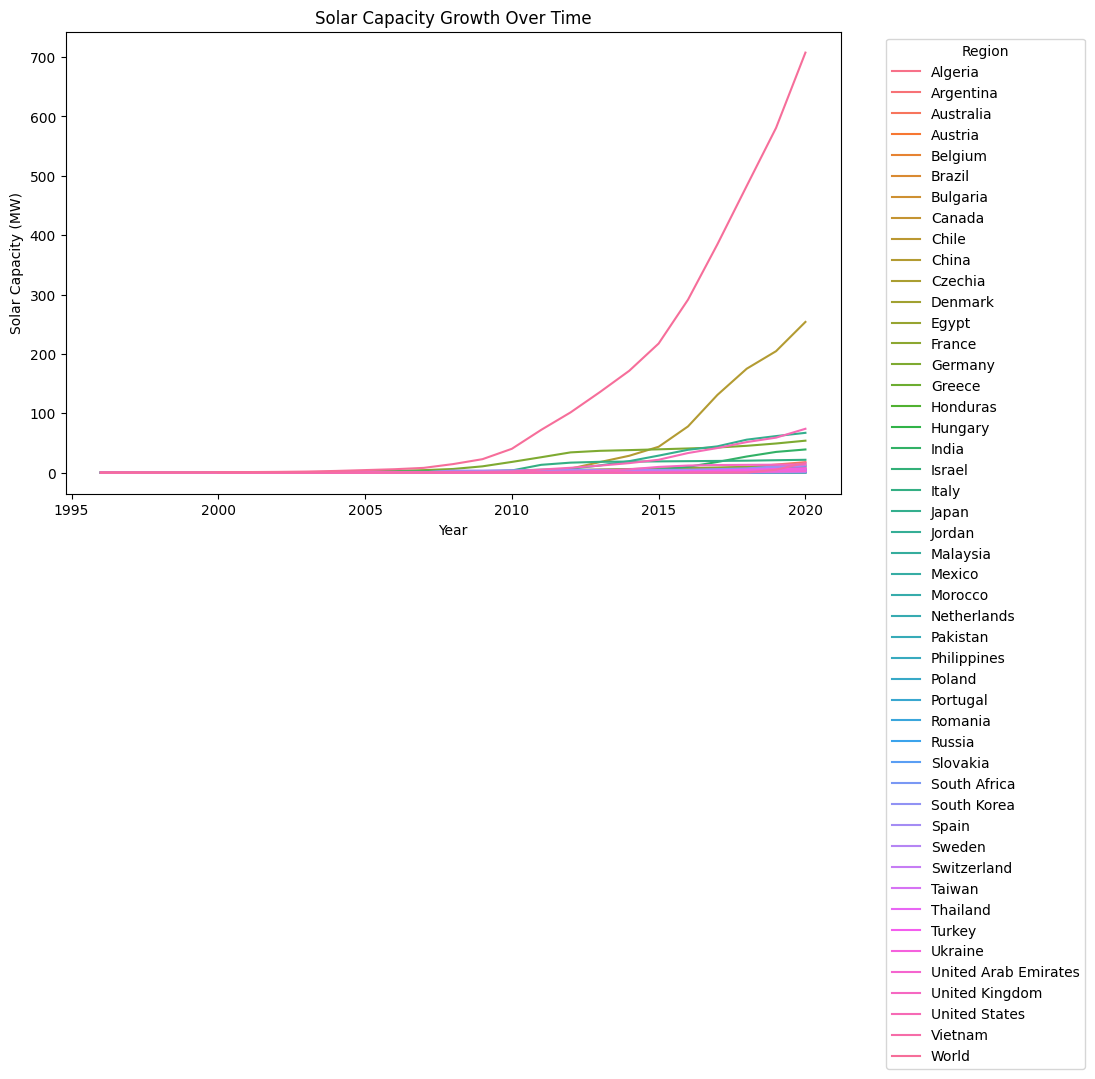

In [30]:
plt.figure(figsize=(10,6))
sns.lineplot(data=solar, x='Year', y='Solar Capacity', hue='Entity')
plt.title('Solar Capacity Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Solar Capacity (MW)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


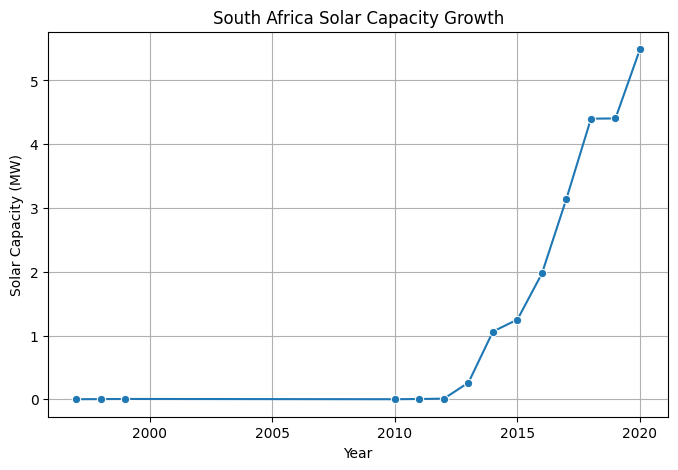

In [31]:
sa_solar = solar[solar['Entity'] == 'South Africa']

plt.figure(figsize=(8,5))
sns.lineplot(data=sa_solar, x='Year', y='Solar Capacity', marker='o')
plt.title('South Africa Solar Capacity Growth')
plt.xlabel('Year')
plt.ylabel('Solar Capacity (MW)')
plt.grid(True)
plt.show()


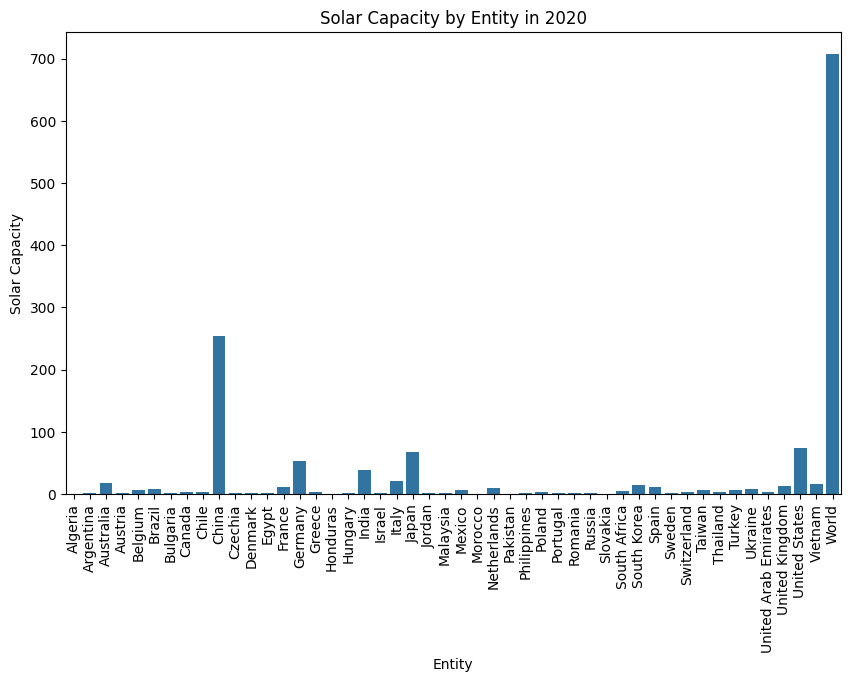

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(data=solar[solar['Year'] == 2020], x='Entity', y='Solar Capacity')
plt.title('Solar Capacity by Entity in 2020')
plt.xticks(rotation=90)
plt.show()


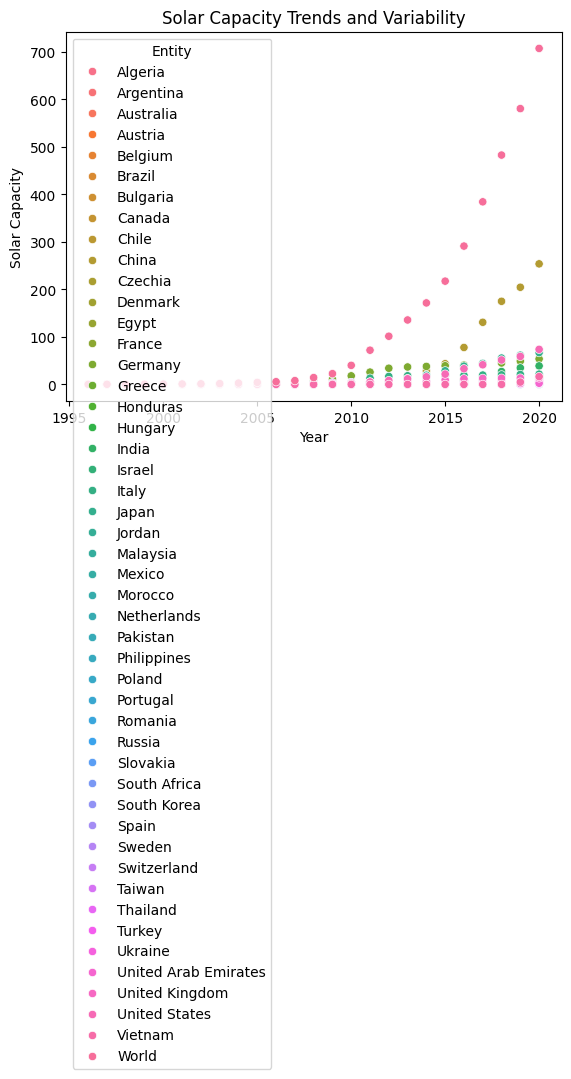

In [33]:
sns.scatterplot(data=solar, x='Year', y='Solar Capacity', hue='Entity')
plt.title('Solar Capacity Trends and Variability')
plt.show()


/tmp/ipython-input-210163152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Entity', y='Solar Capacity', palette='viridis')


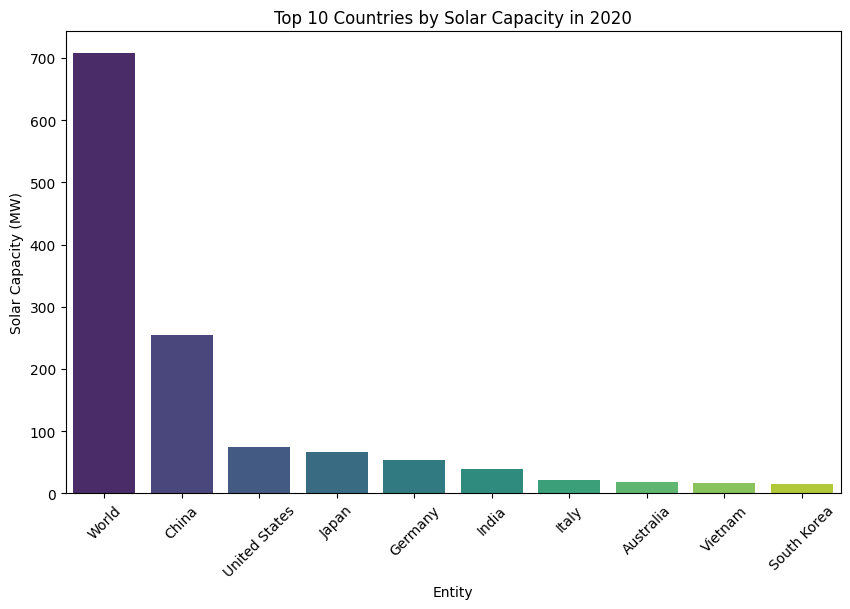

In [34]:
latest_year = solar['Year'].max()
top_countries = solar[solar['Year'] == latest_year].nlargest(10, 'Solar Capacity')

plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, x='Entity', y='Solar Capacity', palette='viridis')
plt.title(f'Top 10 Countries by Solar Capacity in {latest_year}')
plt.xticks(rotation=45)
plt.ylabel('Solar Capacity (MW)')
plt.show()


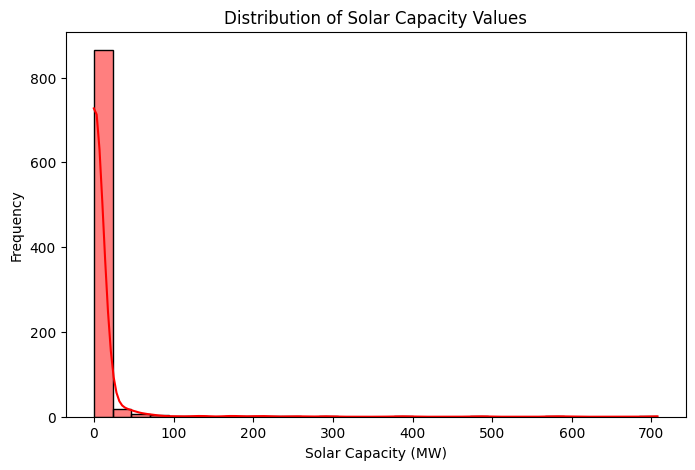

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(data=solar, x='Solar Capacity', bins=30, kde=True, color='red')
plt.title('Distribution of Solar Capacity Values')
plt.xlabel('Solar Capacity (MW)')
plt.ylabel('Frequency')
plt.show()


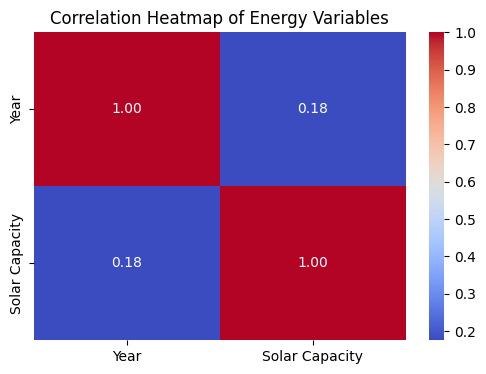

In [36]:
corr = solar.corr(numeric_only=True)
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Energy Variables')
plt.show()


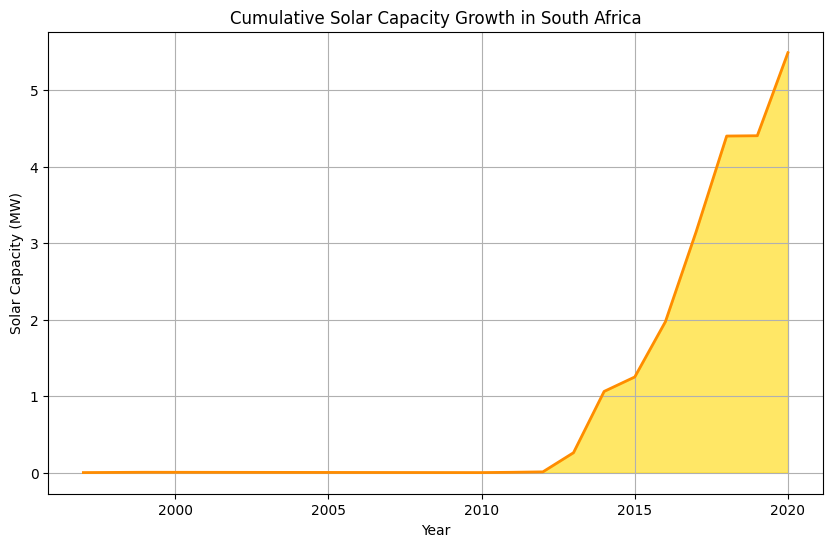

In [37]:
plt.figure(figsize=(10,6))
sa_solar = solar[solar['Entity'] == 'South Africa']
plt.fill_between(sa_solar['Year'], sa_solar['Solar Capacity'], color='gold', alpha=0.6)
plt.plot(sa_solar['Year'], sa_solar['Solar Capacity'], color='darkorange', linewidth=2)
plt.title('Cumulative Solar Capacity Growth in South Africa')
plt.xlabel('Year')
plt.ylabel('Solar Capacity (MW)')
plt.grid(True)
plt.show()


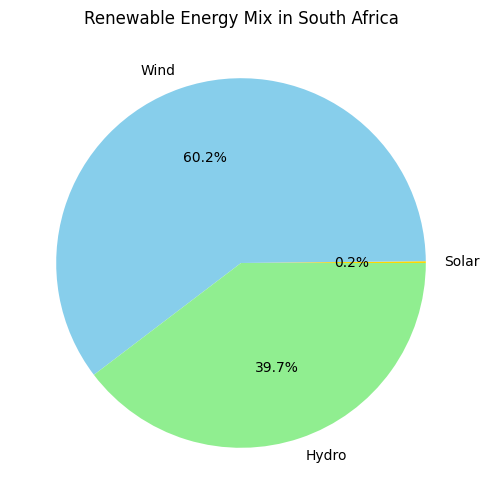

In [38]:
renew_mix = {
    'Solar': sa_solar['Solar Capacity'].sum(),
    'Wind': 8500,   # example values
    'Hydro': 5600
}

plt.figure(figsize=(6,6))
plt.pie(renew_mix.values(), labels=renew_mix.keys(), autopct='%1.1f%%', colors=['gold', 'skyblue', 'lightgreen'])
plt.title('Renewable Energy Mix in South Africa')
plt.show()


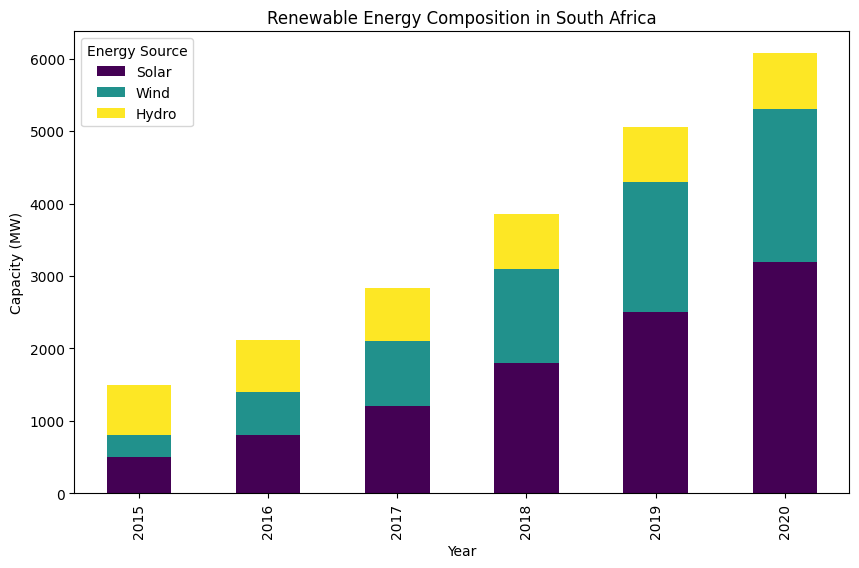

In [39]:
energy = pd.DataFrame({
    'Year': [2015, 2016, 2017, 2018, 2019, 2020],
    'Solar': [500, 800, 1200, 1800, 2500, 3200],
    'Wind': [300, 600, 900, 1300, 1800, 2100],
    'Hydro': [700, 720, 740, 750, 760, 770]
})

energy.set_index('Year').plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title('Renewable Energy Composition in South Africa')
plt.ylabel('Capacity (MW)')
plt.xlabel('Year')
plt.legend(title='Energy Source')
plt.show()


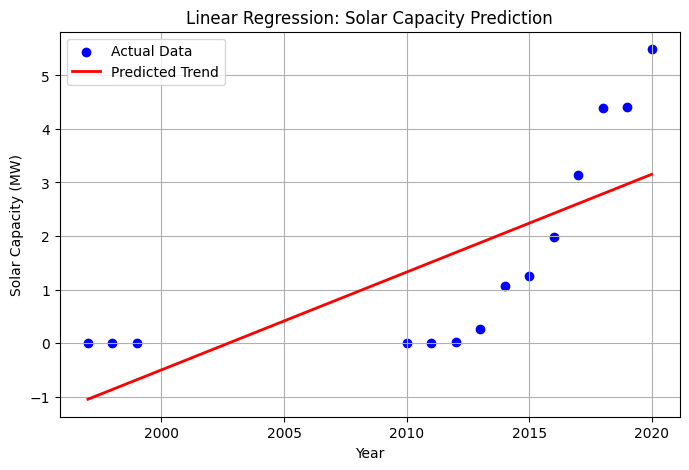

In [40]:
from sklearn.linear_model import LinearRegression
import numpy as np

sa_solar = solar[solar['Entity'] == 'South Africa']
X = sa_solar[['Year']]
y = sa_solar['Solar Capacity']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted Trend')
plt.title('Linear Regression: Solar Capacity Prediction')
plt.xlabel('Year')
plt.ylabel('Solar Capacity (MW)')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
#prediction
# Filter to South Africa only
sa_data = eSolar[eSolar["Entity"] == "South Africa"].copy()

# Select features (X) and target (y)
X = sa_data[["Year"]]
y = sa_data["Solar (% electricity)"]

In [52]:
split_idx = int(len(sa_data) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

In [53]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [44]:
X_train, X_test, y_train, y_test = X, X, y, y

In [54]:
y_pred = model.predict(X_poly)
r2 = r2_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [8, 37]

In [ ]:
# Re-run the train-test split
split_idx = int(len(sa_data) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Re-run the polynomial feature transformation on the correctly split data
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Re-run the model training on the polynomial training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Re-run the prediction and evaluation on the correctly split and transformed test data
y_pred = model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)

print(f"R-squared (R2): {r2}")

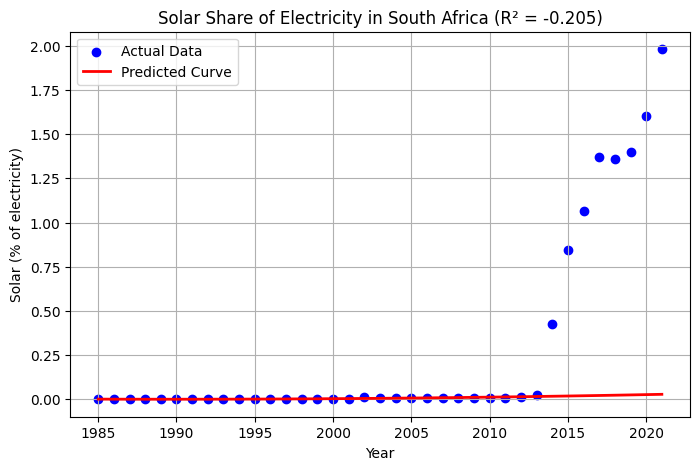

Model Accuracy (R²): -0.205


In [46]:
r2 = r2_score(y, y_pred)

plt.figure(figsize=(8,5))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred, color="red", label="Predicted Curve", linewidth=2)
plt.title(f"Solar Share of Electricity in South Africa (R² = {r2:.3f})")
plt.xlabel("Year")
plt.ylabel("Solar (% of electricity)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Model Accuracy (R²): {r2:.3f}")

In [55]:
!pip install prophet


In [47]:
print(sa_data.shape)
print(sa_data.head(10))


(37, 4)
            Entity Code  Year  Solar (% electricity)
5227  South Africa  ZAF  1985                    0.0
5228  South Africa  ZAF  1986                    0.0
5229  South Africa  ZAF  1987                    0.0
5230  South Africa  ZAF  1988                    0.0
5231  South Africa  ZAF  1989                    0.0
5232  South Africa  ZAF  1990                    0.0
5233  South Africa  ZAF  1991                    0.0
5234  South Africa  ZAF  1992                    0.0
5235  South Africa  ZAF  1993                    0.0
5236  South Africa  ZAF  1994                    0.0


Creating a dash board

In [48]:
!pip install pyngrok --quiet



In [49]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧
added 22 packages in 3s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧

In [50]:
!ls /content/drive/MyDrive/NewDataSet/app.py

/content/drive/MyDrive/NewDataSet/app.py


In [51]:
# Step 1: Install dependencies
!pip install streamlit pyngrok --quiet

# Step 2: Write your Streamlit app to a Python file
%%writefile /content/drive/MyDrive/NewDataSet/app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import numpy as np

st.set_page_config(page_title="Renewable Energy Dashboard", layout="wide")
st.title("Renewable Energy Dashboard 🌞🌬️💧")

# --- File Upload ---
st.sidebar.header("Upload CSV files")
solar_file = st.sidebar.file_uploader("Solar Capacity CSV", type="csv")
eSolar_file = st.sidebar.file_uploader("Solar Share of Electricity CSV", type="csv")
elect_file = st.sidebar.file_uploader("Electricity from Renewables CSV", type="csv")
eWind_file = st.sidebar.file_uploader("Wind Share of Electricity CSV", type="csv")
wind_file = st.sidebar.file_uploader("Wind Generation CSV", type="csv")
renew_file = st.sidebar.file_uploader("Renewable Share Energy CSV", type="csv")
giga_file = st.sidebar.file_uploader("Cumulative Installed Wind Capacity CSV", type="csv")

if solar_file and eSolar_file:
    # Load datasets
    solar = pd.read_csv(solar_file).fillna(0)
    eSolar = pd.read_csv(eSolar_file).fillna(0)

    # Optional merge (simplified)
    merged_df = solar.merge(eSolar, on=['Entity','Code','Year'], how='outer').fillna(0)

    # --- Sidebar filters ---
    country_list = merged_df['Entity'].unique().tolist()
    selected_country = st.sidebar.selectbox("Select Country", country_list)

    # --- Solar Capacity Line Plot ---
    st.subheader(f"Solar Capacity Growth: {selected_country}")
    country_data = solar[solar['Entity'] == selected_country]
    fig, ax = plt.subplots(figsize=(8,5))
    sns.lineplot(data=country_data, x='Year', y='Solar Capacity', marker='o', ax=ax)
    ax.set_xlabel("Year")
    ax.set_ylabel("Solar Capacity (MW)")
    st.pyplot(fig)

    # --- Top Countries Bar Plot ---
    st.subheader("Top 10 Countries by Solar Capacity")
    latest_year = solar['Year'].max()
    top_countries = solar[solar['Year']==latest_year].nlargest(10, 'Solar Capacity')
    fig, ax = plt.subplots(figsize=(10,6))
    sns.barplot(data=top_countries, x='Entity', y='Solar Capacity', palette='viridis', ax=ax)
    plt.xticks(rotation=45)
    st.pyplot(fig)

    # --- Scatter plot for all entities ---
    st.subheader("Solar Capacity Scatter Plot")
    fig, ax = plt.subplots(figsize=(10,6))
    sns.scatterplot(data=solar, x='Year', y='Solar Capacity', hue='Entity', ax=ax)
    st.pyplot(fig)

    # --- Histogram ---
    st.subheader("Distribution of Solar Capacity")
    fig, ax = plt.subplots(figsize=(8,5))
    sns.histplot(data=solar, x='Solar Capacity', bins=30, kde=True, color='red', ax=ax)
    st.pyplot(fig)

    # --- Correlation Heatmap ---
    st.subheader("Correlation Heatmap")
    corr = solar.corr(numeric_only=True)
    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
    st.pyplot(fig)

    # --- Linear Regression: Solar Capacity Prediction ---
    st.subheader(f"Linear Regression Prediction for {selected_country}")
    X = country_data[['Year']]
    y = country_data['Solar Capacity']
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    fig, ax = plt.subplots(figsize=(8,5))
    ax.scatter(X, y, color='blue', label='Actual Data')
    ax.plot(X, y_pred, color='red', linewidth=2, label='Predicted Trend')
    ax.set_xlabel("Year")
    ax.set_ylabel("Solar Capacity (MW)")
    ax.legend()
    st.pyplot(fig)

    # --- Polynomial Regression for Solar Share ---
    st.subheader(f"Solar Share of Electricity Prediction ({selected_country})")
    country_eSolar = eSolar[eSolar['Entity'] == selected_country]
    X = country_eSolar[['Year']]
    y = country_eSolar['Solar (% electricity)']
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)
    fig, ax = plt.subplots(figsize=(8,5))
    ax.scatter(X, y, color='blue', label="Actual Data")
    ax.plot(X, y_pred, color='red', linewidth=2, label=f"Predicted Curve (R²={r2:.3f})")
    ax.set_xlabel("Year")
    ax.set_ylabel("Solar (% of electricity)")
    ax.legend()
    st.pyplot(fig)

st.sidebar.info("Upload CSV files to visualize and predict renewable energy data.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 117.0 MB/s eta 0:00:00


UsageError: Line magic function `%%writefile` not found.


In [ ]:
!streamlit run /content/drive/MyDrive/NewDataSet/app.py &

from pyngrok import ngrok
import time

# Allow time for Streamlit to start
time.sleep(5)

# Connect to the Streamlit port
public_url = ngrok.connect(port=8501)

print(f"Streamlit app is running at: {public_url}")

In [ ]:
from pyngrok import ngrok

# Replace "YOUR_NGROK_AUTH_TOKEN" with your actual ngrok authtoken
ngrok.set_auth_token("YOUR_NGROK_AUTH_TOKEN")

In [ ]:
!streamlit run /content/drive/MyDrive/NewDataSet/app.py &